### Zadanie 2

Twoim zadaniem jest wykonanie 10 podzadań, wykorzystując bazę danych school.db z tabelami students, courses i enrollments. Poniżej znajdują się zapytania SQL, które należy napisać i wykonać, używając operacji JOIN.

Struktura tabel w bazie `school.db`

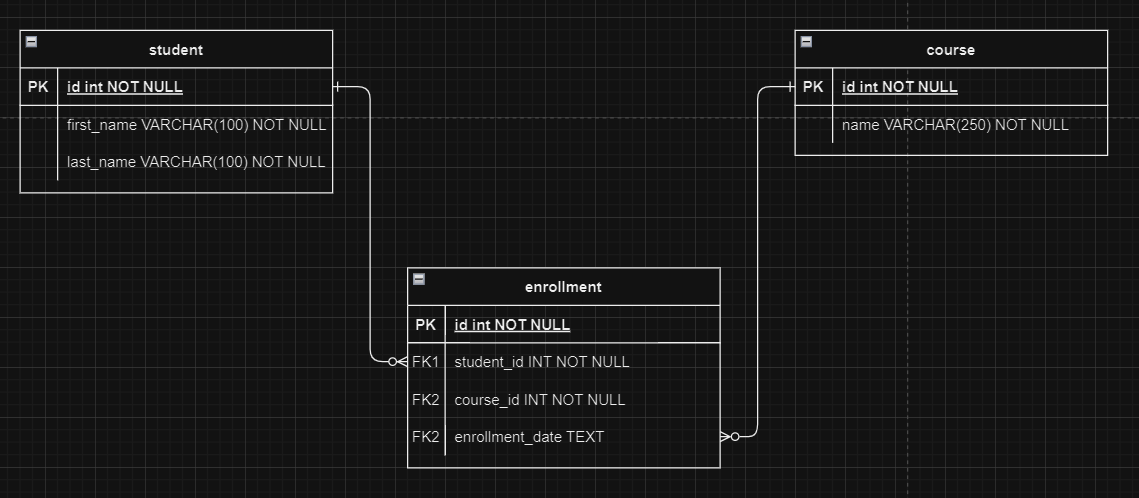

Aby utworzyć bazę `company.db` wykonaj w terminalu, w katalogu w którym znaduje się ten notatnik komendę:
<pre><code>python setup_school_db.py</code></pre>

##### A. Wyświetl imiona i nazwiska wszystkich studentów wraz z nazwami kursów, na które są zapisani.

SELECT student.first_name, student.last_name, course.course_name \
FROM student \
JOIN enrollment ON student.id = enrollment.student_id \
JOIN course ON enrollment.course_id = course.id; 

##### B. Wyświetl imiona i nazwiska studentów oraz daty zapisów na kurs 'Mathematics'.

SELECT students.first_name, students.last_name, enrollments.enrollment_date \
FROM students \
JOIN enrollments ON students.id = enrollments.student_id \
JOIN courses ON enrollments.course_id = courses.id \
WHERE courses.course_name = 'Mathematics';

##### C. Policz liczbę studentów zapisanych na każdy kurs.

SELECT courses.course_name, COUNT(enrollments.student_id) as num_students \
FROM courses \
JOIN enrollments ON courses.id = enrollments.course_id \
GROUP BY courses.course_name;

##### D. Wyświetl nazwiska studentów, którzy są zapisani na więcej niż jeden kurs.

SELECT students.last_name, COUNT(enrollments.course_id) as num_courses \
FROM students \
JOIN enrollments ON students.id = enrollments.student_id \
GROUP BY students.id \
HAVING num_courses > 1;`

##### E. Wyświetl imiona i nazwiska studentów, którzy nie są zapisani na żaden kurs.

SELECT students.first_name, students.last_name \
FROM students \
LEFT JOIN enrollments ON students.id = enrollments.student_id \
WHERE enrollments.student_id IS NULL;`

##### F. Wyświetl nazwę kursu i liczbę zapisanych studentów, sortując wyniki według liczby zapisanych studentów malejąco.

SELECT courses.course_name, COUNT(enrollments.student_id) as num_students \
FROM courses \
JOIN enrollments ON courses.id = enrollments.course_id \
GROUP BY courses.course_name \
ORDER BY num_students DESC;`

##### G. Wyświetl imiona i nazwiska studentów, którzy zapisali się na kursy w 2023 roku.

SELECT students.first_name, students.last_name \
FROM students \
JOIN enrollments ON students.id = enrollments.student_id \
WHERE enrollments.enrollment_date LIKE '2023%';

##### H. Wyświetl imiona i nazwiska studentów oraz nazwy kursów, na które są zapisani, sortując wyniki według nazwisk studentów.

SELECT students.first_name, students.last_name, courses.course_name \
FROM students \
JOIN enrollments ON students.id = enrollments.student_id \
JOIN courses ON enrollments.course_id = courses.id \
ORDER BY students.last_name;`

##### I. Wyświetl nazwy kursów, na które nie jest zapisany żaden student.

SELECT courses.course_name \
FROM courses \
LEFT JOIN enrollments ON courses.id = enrollments.course_id \
WHERE enrollments.course_id IS NULL;

##### J. Wyświetl imiona, nazwiska i liczby kursów, na które jest zapisany każdy student, sortując wyniki według liczby kursów malejąco.

SELECT students.first_name, students.last_name, COUNT(enrollments.course_id) as num_courses \
FROM students \
JOIN enrollments ON students.id = enrollments.student_id \
GROUP BY students.id \
ORDER BY num_courses DESC;